Referencias Utilizadas

MA: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

Importando todas as biliotecas necessárias


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Métodos gerais


In [0]:
def parserDate(x):
	return pd.datetime.strptime(x, '%d.%m.%Y')

Organização dos dados


In [19]:
#Soja
uriSoja = "https://raw.githubusercontent.com/jonatas1927/tcc-test/master/Data/Soja%20NY%20Futuros%20Dados%20Hist%C3%B3ricos%20%2003.01.2000-07.03.2019%20.csv"
seriesSoja = pd.read_csv(uriSoja)

mapaSoja = { 
    "Último" : "Ultimo",
    "Máxima" : "Maxima",
    "Mínima" : "Minima",
    "Var%" : "Variacao"
}

seriesSoja = seriesSoja.rename(columns = mapaSoja)


seriesSoja['Ultimo'] = seriesSoja['Ultimo'].map(lambda x: float(x.replace('.', '').replace(',', '.')))
seriesSoja['Abertura'] = seriesSoja['Abertura'].map(lambda x: float(x.replace('.', '').replace(',', '.')))
seriesSoja['Minima'] = seriesSoja['Minima'].map(lambda x: float(x.replace('.', '').replace(',', '.')))
seriesSoja['Maxima'] = seriesSoja['Maxima'].map(lambda x: float(x.replace('.', '').replace(',', '.')))
seriesSoja['Variacao'] = seriesSoja['Variacao'].map(lambda x: float(x.replace('%', '').replace('.', '').replace(',', '.')))
seriesSoja['Date'] = seriesSoja['Data'].map(lambda x: parserDate(x))


seriesSoja.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,Data,Ultimo,Abertura,Maxima,Minima,Vol.,Variacao,Date
0,07.03.2019,901.50,902.00,907.38,898.38,-,-0.06,2019-03-07
1,06.03.2019,902.00,913.75,916.12,901.12,-,-1.29,2019-03-06
2,05.03.2019,913.75,916.25,918.38,909.12,-,-0.27,2019-03-05
3,04.03.2019,916.25,914.88,924.38,913.12,-,0.62,2019-03-04
4,01.03.2019,910.62,910.00,917.88,900.62,-,0.07,2019-03-01


In [16]:
for i in range(0,seriesSoja.shape[0]-2):
    seriesSoja.loc[seriesSoja.index[i+2],'SMA_3'] = np.round(((seriesSoja.iloc[i,1]+ seriesSoja.iloc[i+1,1] +seriesSoja.iloc[i+2,1])/3),1)
print("sma 3")
print(seriesSoja.head())

seriesSoja['pandas_SMA_3'] = seriesSoja.iloc[:,1].rolling(window=3).mean()
print("pandas_SMA_3")
print(seriesSoja.head())

for i in range(0,seriesSoja.shape[0]-3):
    seriesSoja.loc[seriesSoja.index[i+3],'SMA_4'] = np.round(((seriesSoja.iloc[i,1]+ seriesSoja.iloc[i+1,1] +seriesSoja.iloc[i+2,1]+seriesSoja.iloc[i+3,1])/4),1)

print("SMA_4")
print(seriesSoja.head())


seriesSoja['pandas_SMA_4'] = seriesSoja.iloc[:,1].rolling(window=4).mean()
print("pandas_SMA_4")
print(seriesSoja.head())


sma 3
         Data  Ultimo  Abertura  Maxima  Minima Vol.  Variacao  SMA_3
0  07.03.2019  901.50    902.00  907.38  898.38    -     -0.06    NaN
1  06.03.2019  902.00    913.75  916.12  901.12    -     -1.29    NaN
2  05.03.2019  913.75    916.25  918.38  909.12    -     -0.27  905.8
3  04.03.2019  916.25    914.88  924.38  913.12    -      0.62  910.7
4  01.03.2019  910.62    910.00  917.88  900.62    -      0.07  913.5
pandas_SMA_3
         Data  Ultimo  Abertura  Maxima  ...  Vol. Variacao  SMA_3  pandas_SMA_3
0  07.03.2019  901.50    902.00  907.38  ...     -    -0.06    NaN           NaN
1  06.03.2019  902.00    913.75  916.12  ...     -    -1.29    NaN           NaN
2  05.03.2019  913.75    916.25  918.38  ...     -    -0.27  905.8    905.750000
3  04.03.2019  916.25    914.88  924.38  ...     -     0.62  910.7    910.666667
4  01.03.2019  910.62    910.00  917.88  ...     -     0.07  913.5    913.540000

[5 rows x 9 columns]
SMA_4
         Data  Ultimo  Abertura  Maxima  ...  V

Graficos MA


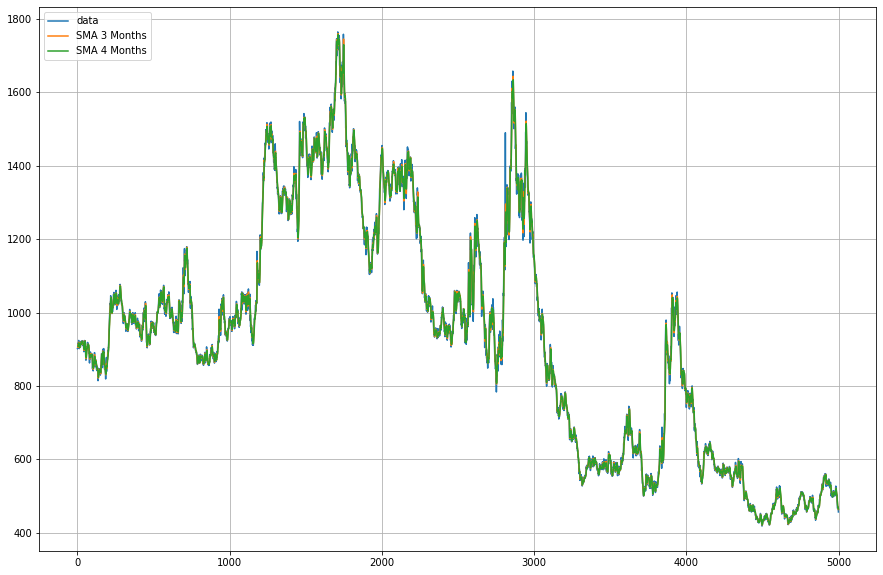

In [18]:
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(seriesSoja['Ultimo'],label='data')
plt.plot(seriesSoja['SMA_3'],label='SMA 3 Months')
plt.plot(seriesSoja['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

AutoArima
